In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import scanpy as sc
import anndata as ad
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from tqdm.notebook import tqdm

In [2]:
parameter_dict = {
    "test_id": "filtered-strict-576", 
    "do_regress_out": True,
    "do_combat": False,
    "n_neighbors": [50],
    "n_pcs": [15],
    "cluster_resolution": [.5, 1, 1.5, 2],
}

In [3]:
# base_path = '/home/unix/jiahao/wanglab/Data/Analyzed/2024-01-08-Jiakun-MouseSpleen64Gene/'
base_path = 'Z:/Data/Analyzed/2024-01-08-Jiakun-MouseSpleen64Gene/'
output_path = os.path.join(base_path, 'output')
expr_path = os.path.join(base_path, 'expr')
test_path = os.path.join(output_path, parameter_dict['test_id'])
if not os.path.exists(test_path):
    os.mkdir(test_path)
    
cdata = sc.read_h5ad(os.path.join(expr_path, f'combined-filtered-strict-576.h5ad'))

# pp 
sc.pp.normalize_total(cdata)
sc.pp.log1p(cdata)
cdata.raw = cdata
sc.pp.scale(cdata)
cdata.layers['scaled'] = cdata.X.copy()

In [4]:
if parameter_dict['do_regress_out']:
    sc.pp.regress_out(cdata, ['total_counts'])
    cdata.layers['corrected'] = cdata.X.copy()

if parameter_dict['do_combat']:   
    sc.pp.combat(cdata, 'sample')
    cdata.layers['combat'] = cdata.X.copy()

C:\Users\jiahao\.conda\envs\sc_38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\jiahao\.conda\envs\sc_38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [5]:
cdata

AnnData object with n_obs × n_vars = 1833564 × 64
    obs: 'sample', 'fov_id', 'volume', 'fov_x', 'fov_y', 'fov_z', 'seg_label', 'global_x', 'global_y', 'global_z', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'n_counts', 'n_genes'
    var: 'mean', 'std'
    uns: 'log1p'
    layers: 'raw', 'scaled', 'corrected'

In [6]:
# add condition 
cdata.obs['condition'] = cdata.obs['sample'].values
condition_dict = {
    'sample1': 'WT',
    'sample2': "WT",
    'sample3': "99R",
    'sample4': '99R',
    'sample5': '33NM',
    'sample6': '33NM'
}
cdata.obs['condition'] = cdata.obs['condition'].map(condition_dict)
cdata.obs['condition'] = cdata.obs['condition'].astype('category')
cdata.obs['sample'] = cdata.obs['sample'].astype('category')
cdata.obs['sample'].value_counts()

sample4    406112
sample3    376603
sample5    327649
sample1    293859
sample6    258073
sample2    171268
Name: sample, dtype: int64

In [13]:
cdata.obs['condition'].value_counts()

99R     782715
33NM    585722
WT      465127
Name: condition, dtype: int64

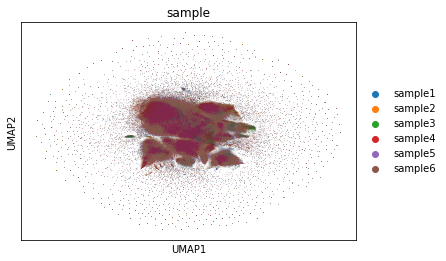

In [7]:
# pca
sc.tl.pca(cdata, svd_solver='full')
sc.pp.neighbors(cdata, n_neighbors=50, n_pcs=15)

# umap
sc.tl.umap(cdata, min_dist=.5, spread=2)
sc.pl.umap(cdata, color='sample',)

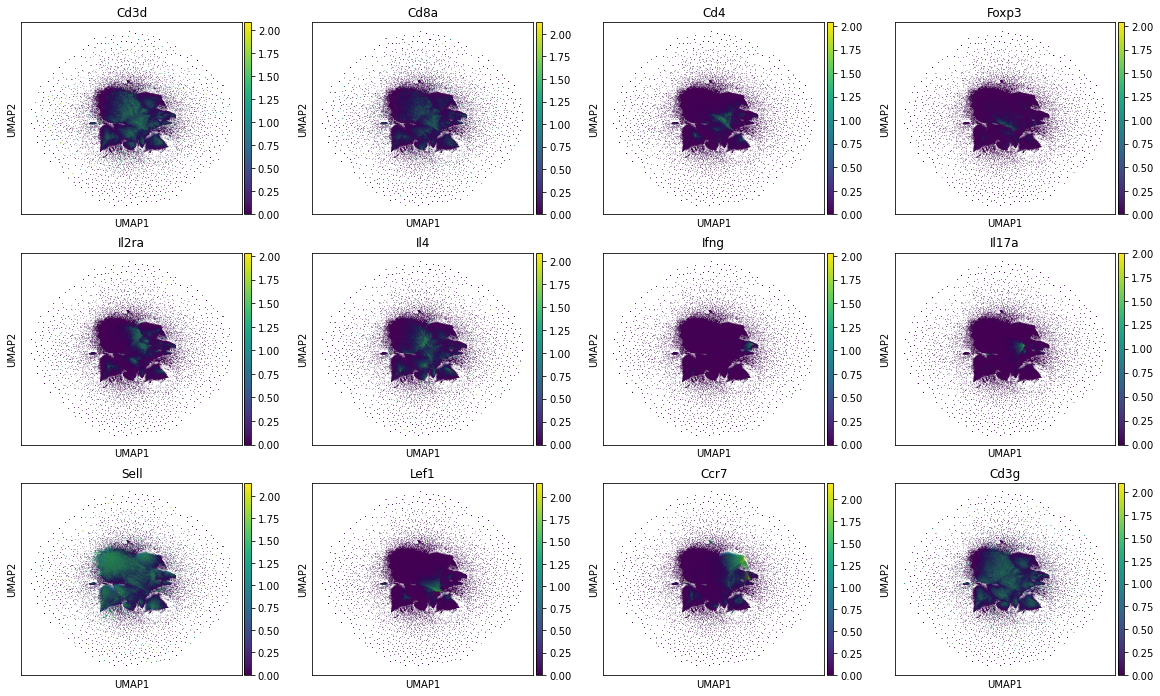

In [8]:
t_cell_genes = ['Cd3d', 'Cd8a', 'Cd4', 'Foxp3', 'Il2ra', 'Il4', 'Ifng', 'Il17a', 'Sell', 'Lef1', 'Ccr7', 'Cd3g']

fig, axs = plt.subplots(ncols=4, nrows=3, figsize=(20, 12))
axs = axs.flatten()

for i, current_gene in enumerate(t_cell_genes):
    sc.pl.umap(cdata, color=current_gene, ax=axs[i], show=False)

plt.show()

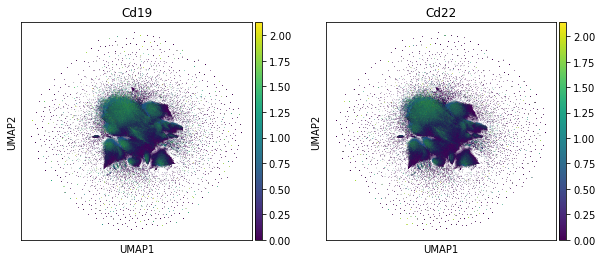

In [9]:
b_cell_genes = ['Cd19', 'Cd22']

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 4))
axs = axs.flatten()

for i, current_gene in enumerate(b_cell_genes):
    sc.pl.umap(cdata, color=current_gene, ax=axs[i], show=False)

plt.show()

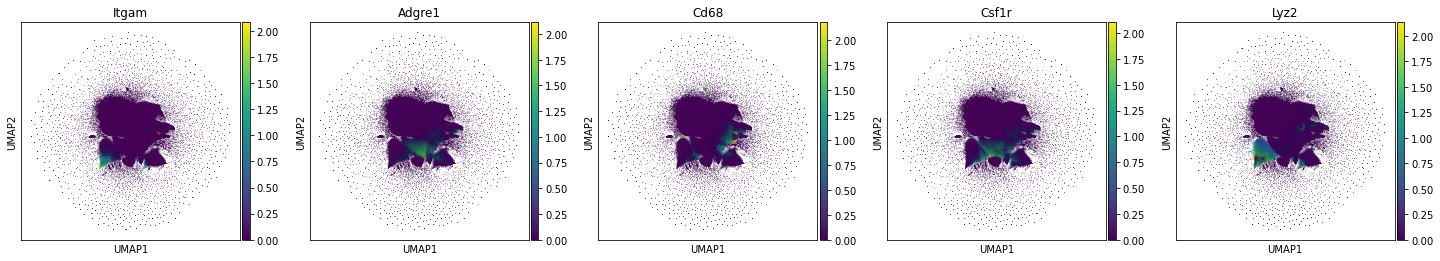

In [10]:
macro_cell_genes = ['Itgam', 'Adgre1', 'Cd68', 'Csf1r', 'Lyz2']

fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(25, 4))
axs = axs.flatten()

for i, current_gene in enumerate(macro_cell_genes):
    sc.pl.umap(cdata, color=current_gene, ax=axs[i], show=False)

plt.show()

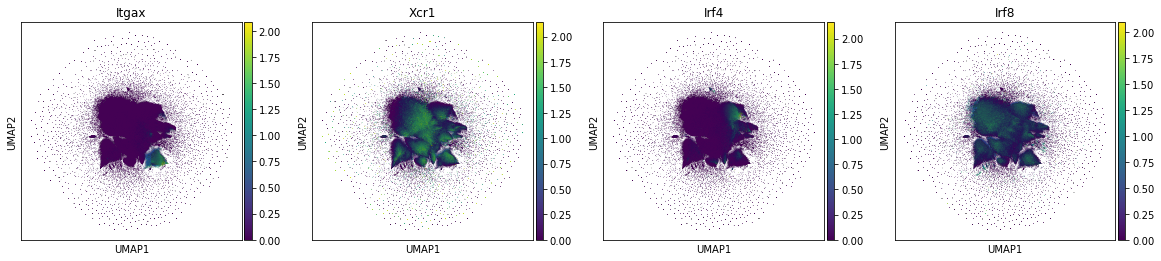

In [11]:
dendri_cell_genes = ['Itgax', 'Xcr1', 'Irf4', 'Irf8']

fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(20, 4))
axs = axs.flatten()

for i, current_gene in enumerate(dendri_cell_genes):
    sc.pl.umap(cdata, color=current_gene, ax=axs[i], show=False)

plt.show()

In [12]:
cdata.write_h5ad(os.path.join(output_path, f'combined-filtered-strict-umap.h5ad'))

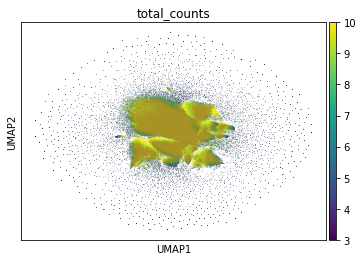

In [17]:
sc.pl.umap(cdata, color='total_counts', vmax=10)

<AxesSubplot:xlabel='total_counts', ylabel='Count'>

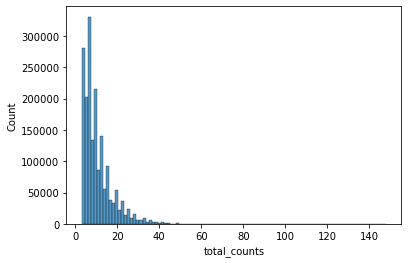

In [19]:
sns.histplot(cdata.obs['total_counts'], bins=100)

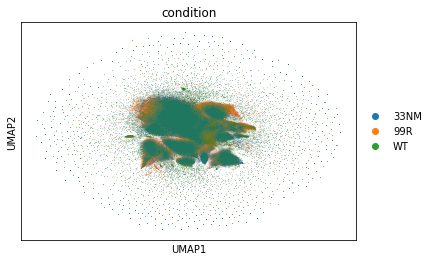

In [20]:
sc.pl.umap(cdata, color='condition')

In [27]:
sdata = cdata[cdata.obs['condition'] == 'WT', ]
sdata

View of AnnData object with n_obs × n_vars = 465127 × 64
    obs: 'sample', 'fov_id', 'volume', 'fov_x', 'fov_y', 'fov_z', 'seg_label', 'global_x', 'global_y', 'global_z', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'n_counts', 'n_genes', 'condition'
    var: 'mean', 'std'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'sample_colors', 'condition_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'raw', 'scaled', 'corrected'
    obsp: 'distances', 'connectivities'

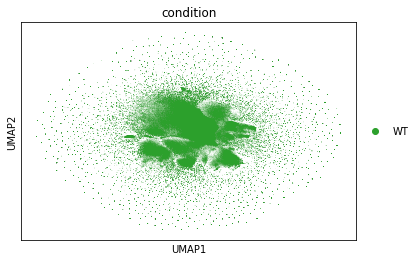

In [28]:
sc.pl.umap(sdata, color='condition')